<a href="https://colab.research.google.com/github/dirudiez/TFM_DiegoRudiez/blob/main/2.%20Clasificador%20Binario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install fastai -Uq

#Reiniciamos el entorno de ejecución automáticamente
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}

In [1]:
from fastai.vision.all import *

In [3]:
!wget https://www.dropbox.com/s/o1eaoae59qgdo4i/Training_Set_Pre.zip?dl=0 -O train.zip

--2022-05-19 06:45:24--  https://www.dropbox.com/s/o1eaoae59qgdo4i/Training_Set_Pre.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/o1eaoae59qgdo4i/Training_Set_Pre.zip [following]
--2022-05-19 06:45:24--  https://www.dropbox.com/s/raw/o1eaoae59qgdo4i/Training_Set_Pre.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb6232540fa6b701c873160c098.dl.dropboxusercontent.com/cd/0/inline/BlhDBtDth5b2uhaN3JrW3G3VfKBLglf6h4qJQx00QigXYKEZHCsWI8gp0jK1yY_iewh1lJhVciXaNTYpnFwMqw1_kLiapPWWGXd9DpkAj9zBacIhS6W3hLGF5esqxapfmEFZHnYVAbPQoYSDmmaoPMqCDY5Om_wJm8z8d_XzRpfaAA/file# [following]
--2022-05-19 06:45:25--  https://ucb6232540fa6b701c873160c098.dl.dropboxusercontent.com/cd/0/inline/BlhDBtDth5b2uhaN3JrW3G3VfKBLglf6h4qJQx0

In [7]:
# !rm -rvf Training_Set_Pre
!unzip -qq train.zip #no verbose

Tenemos que cambiar la estructura del dataset


```.
└── dataset
    ├── train
    │   ├── normal
    │   └── enfermedad
    ├── test
    │   ├── normal
    │   └── enfermedad
    └── validation
        ├── normal
        └── enfermedad
```

Para ello usaremos el archivo csv de cada conjunto para mover cada imagen a donde corresponda

In [2]:
#Train Normal y Enfermedad
trainN='dataset/train/normal'
trainE='dataset/train/enfermedad'

test='dataset/test'
val='dataset/val'

!mkdir dataset
!mkdir dataset/train
!mkdir "$trainN"
!mkdir "$trainE"

!mkdir "$test"
!mkdir "$val"

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/train’: File exists
mkdir: cannot create directory ‘dataset/train/normal’: File exists
mkdir: cannot create directory ‘dataset/train/enfermedad’: File exists
mkdir: cannot create directory ‘dataset/test’: File exists
mkdir: cannot create directory ‘dataset/val’: File exists


En este caso estamos usando el dataset que ha sido preprocesados mediante el método de recorte

In [3]:
trainPath = Path('Training_Set_Pre/')
testPath  = Path('Test_Set_Pre/')
valPath  =  Path('Evaluation_Set_Pre/')

In [4]:
df_train = pd.read_csv(str(trainPath) + '/train.csv')

In [5]:
#1519 tienen enfermedad y 401 no la tienen
df_train['Disease_Risk'].value_counts()

1    1519
0     401
Name: Disease_Risk, dtype: int64

In [ ]:
import shutil
for id,enf in zip(df_train['ID'], df_train['Disease_Risk']):
    if(int(enf)==0):
        shutil.copy(str(trainPath)+'/Training/' + str(id) + '.png', trainN)
    else:
        shutil.copy(str(trainPath)+'/Training/' + str(id) + '.png', trainE)      

In [ ]:
len(Path(trainPath/'Training').ls()) #1921
len(Path(testPath/'Test').ls())      #640
len(Path(valPath/'Validation').ls()) #640

640

Ahora que ya tenemos la estructura deseado empezamos a construir el modelo:

In [ ]:
trainPath = Path('dataset/train')

In [ ]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))

In [ ]:
dls = db.dataloaders(trainPath,bs=128)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


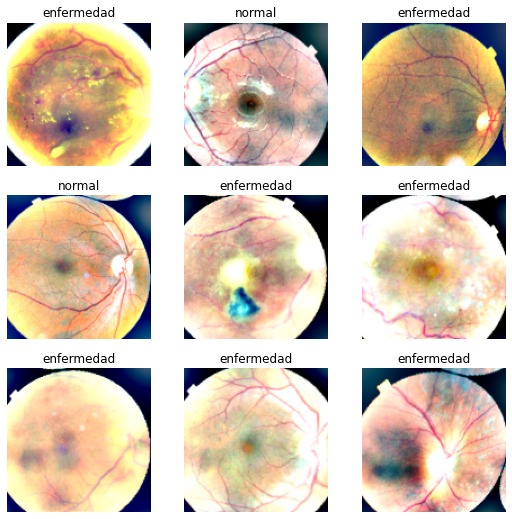

In [ ]:
dls.show_batch()